In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read cvs file to a dataframe

df=pd.read_csv('data.csv')
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [3]:
#show basic statistical description
print(df.describe())

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [4]:
#check for null values
print(df.isnull().sum())

#replace null values with mean of the column
df.fillna(df.mean(), inplace=True)

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [5]:
#aggregate data for 'Duration' and 'Calories' columns
aggregated_data=df[['Duration', 'Calories']].agg(['min','max','count','mean'])
print(aggregated_data)

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [6]:
#Filter rows with calories between 500 and 1000
filtered_data=df[(df['Calories']>=500) & (df['Calories']<=1000)]
print(filtered_data)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [8]:
#filter rows with calories>500 and pulse<100
filtered_data_2=df[(df['Calories']>500) & (df['Pulse']<100)]
print(filtered_data_2)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [9]:
#create a new dataframe without 'MaxPulse'
df_modified=df.drop(columns=['Maxpulse'])
print(df_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [10]:
#delete 'MaxPulse' from the main dataframe
df.drop(columns=['Maxpulse'], inplace=True)
print(df)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [11]:
#convert 'Calories' column to int datatype
df['Calories']=df['Calories'].astype(int)
print(df.dtypes)


Duration    int64
Pulse       int64
Calories    int64
dtype: object


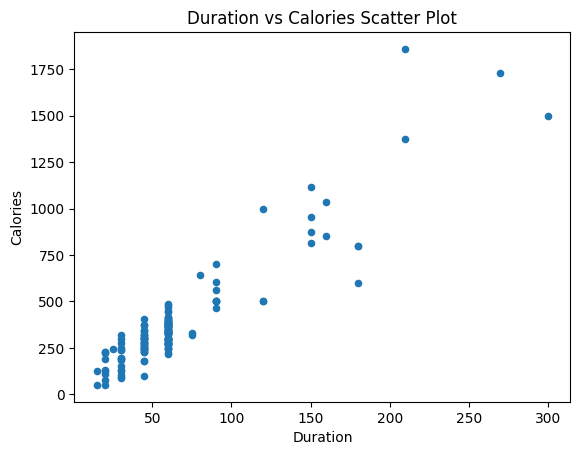

In [12]:
#scatter plot for 'Duration' and 'Calories'
df.plot(kind='scatter', x='Duration', y='Calories',title='Duration vs Calories Scatter Plot')
plt.show()

Linear Regression

In [16]:
import pandas as pd

#read csv into a dataframe
df=pd.read_csv('Salary_Data.csv')

#Display first few rows of dataframe to verify
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [17]:
from sklearn.model_selection import train_test_split

#assuming 'YearsExperience' is the feature and 'Salary' is the target
x=df[['YearsExperience']]
y=df['Salary']

#split the data into training and testing sets(1/3 test,2/3 train)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/3,random_state=42)

print(f"Training set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")

Training set size: 20
Testing set size: 10


In [21]:
from sklearn.linear_model import LinearRegression

#create and train the model
model= LinearRegression()
model.fit(x_train,y_train)

#make predictions
y_pred=model.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

#calculate mean squarred error
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 35301898.887134895


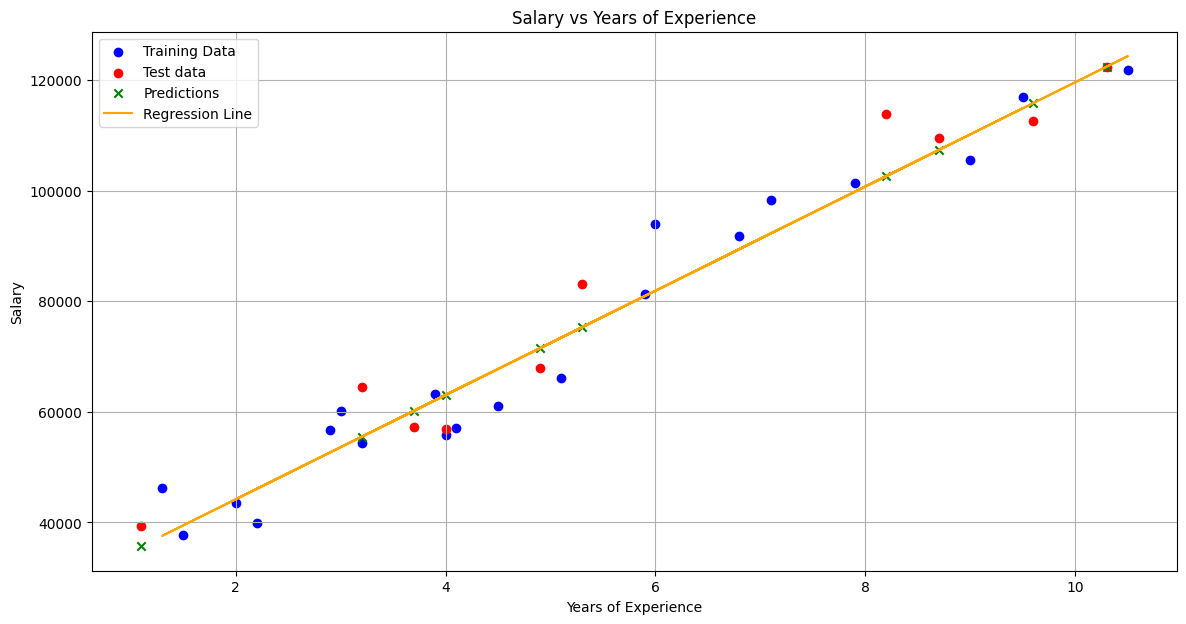

In [24]:
import matplotlib.pyplot as plt

#plot training data

plt.figure(figsize=(14,7))

plt.scatter(x_train,y_train,color='blue',label='Training Data')

#plot test data and predictons
plt.scatter(x_test,y_test,color='red',label='Test data')
plt.scatter(x_test,y_pred,color='green',marker='x',label='Predictions')

#plotting the regression line
plt.plot(x_train,model.predict(x_train),color='orange',label='Regression Line')



plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.grid(True)
plt.show()